In [1]:
import plotly.graph_objects as go
import copy as cp
from pprint import pprint
from gurobipy import *
from random import *
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
import time
from itertools import groupby,chain
import itertools
import pandas as pd
from pandas import *
import networkx as nx
import random
from random import shuffle
from itertools import chain
import string
import json
from dataclasses import dataclass
import uuid
import bisect
from datetime import datetime

In [2]:
delta = 0.05
update_interval = 2
rcl_parameter = 0.3
llambda = 0.7

In [3]:
graph_top_left = [x for x in chain(range(0,11), range(27,38),range(54,65),range(81,92),range(108,119),range(135,146),range(162,173),range(189,200),range(216,227),range(243,254),range(270,281),range(297,308),range(324,335),range(351,362))]
graph_top_right = [x for x in chain(range(378,389),range(405,416),range(432,443),range(459,470),range(486,497),range(513,524),range(540,551),range(567,578),range(594,605),range(621,632),range(648,658),range(675,686),range(702,712))]
graph_center = [x for x in chain(range(200,208), range(227,234),range(253,261),range(281,289),range(308,316),range(335,343),range(362,370),range(389,397),range(416,424),range(443,451),range(470,478),range(497,505),range(524,532))]
graph_left  = [x for x in chain(range(11,19), range(38,46),range(65,73),range(92,100),range(119,127),range(146,154),range(173,181))]
graph_right = [x for x in chain(range(551,559), range(578,586),range(605,613),range(632,640),range(659,667),range(686,694),range(713,721))]
graph_bottom_left = [x for x in chain(range(19,27), range(46,54),range(73,81),range(100,108),range(127,135),range(154,162),range(181,189),range(208,216),range(235,243),range(262,270),range(289,297),range(316,324),range(343,351),range(370,378))]
graph_bottom_right = [x for x in chain(range(397,405),range(424,432),range(451,459),range(478,486),range(505,513),range(532,540),range(559,567),range(586,594),range(613,621),range(640,648),range(667,675),range(694,702),range(721,728))]

In [968]:
N = 27
G1 = nx.grid_2d_graph(N,N)

labels=dict(((i,j),i + (N-1-j)*N) for i, j in G1.nodes())
nx.relabel_nodes(G1,labels,False) #False=relabel the nodes in place
inds=labels.keys()
vals=labels.values()
inds=[(N-j-1,N-i-1) for i,j in inds]

#Create the dictionary of positions for the grid
grid_pos=dict(zip(vals,inds)) #Format: {node ID:(i,j)}

random.seed(511566511)
nodes = list(G1.nodes)
edges = list(G1.edges)

# top_left_remove = random.sample(graph_top_left,20)
# top_right_remove = random.sample(graph_top_right,10)
# bottom_left_remove = random.sample(graph_bottom_left,25)
# bottom_right_remove = random.sample(graph_bottom_right,35)
center_remove = random.sample(graph_center,50)
left_remove =random.sample(graph_left,50)
right_remove = random.sample(graph_right,50)

while nx.is_connected(G1) == True:
    while len(G1) > 500:
    

    #     G12.remove_nodes_from(top_left_remove)
    #     G12.remove_nodes_from(top_right_remove)
    #     G12.remove_nodes_from(bottom_left_remove)
    #     G12.remove_nodes_from(bottom_right_remove)
        G1.remove_nodes_from(center_remove)
        G1.remove_nodes_from(left_remove)
        G1.remove_nodes_from(right_remove)
        G1.remove_node(random.choice(list(G1.nodes)))
        if len(list(nx.isolates(G1)))>0:
            G1.remove_nodes_from(list(nx.isolates(G1)))
#         if nx.is_connected(G26) == False:
#             G26 = G26_C
#         else:
#             G26_C=G26.copy()
#     if len(G26) <= 500:
#             break


#Create the dictionary of positions for the grid
grid_pos=dict(zip(vals,inds)) #Format: {node ID:(i,j)}

G1.add_edge(201,203)
G1.add_edge(258,256)
G1.add_edge(231,233)
G1.add_edge(496,500)
G1.add_edge(523,527)
G1.add_edge(527,529)
G1.add_edge(422,424)
G1.add_edge(449,451)
G1.add_edge(391,389)
G1.add_edge(365,363)


#Clean the dictionaries in accordance with how we changed the original graph
for i in list(grid_pos):
    if i not in G1.nodes:
        grid_pos.pop(i)
        
coords = []
for i in inds:
    for key, value in grid_pos.items():
        if i == value:
            coords.append(i)

In [4]:
N = 6
G1 = nx.grid_2d_graph(N,N)

labels=dict(((i,j),i + (N-1-j)*N) for i, j in G1.nodes())
nx.relabel_nodes(G1,labels,False) #False=relabel the nodes in place
inds=labels.keys()
vals=labels.values()
inds=[(N-j-1,N-i-1) for i,j in inds]

#Create the dictionary of positions for the grid
grid_pos=dict(zip(vals,inds)) #Format: {node ID:(i,j)}

random.seed(511566511)
nodes = list(G1.nodes)
edges = list(G1.edges)

# top_left_remove = random.sample(graph_top_left,20)
# top_right_remove = random.sample(graph_top_right,10)
# bottom_left_remove = random.sample(graph_bottom_left,25)
# bottom_right_remove = random.sample(graph_bottom_right,35)
# center_remove = random.sample(graph_center,50)
# left_remove =random.sample(graph_left,50)
# right_remove = random.sample(graph_right,50)

# while nx.is_connected(G1) == True:
#     while len(G1) > 20:
    


#         if len(list(nx.isolates(G1)))>0:
#             G1.remove_nodes_from(list(nx.isolates(G1)))
#         if nx.is_connected(G1) == False:
#             G1 = G1_C
#         else:
#             G1_C=G1.copy()
#         if len(G1) <= 20:
#                 break


#Create the dictionary of positions for the grid
grid_pos=dict(zip(vals,inds)) #Format: {node ID:(i,j)}


# G1.remove_node(11)
# G1.remove_node(8)
# G1.remove_node(18)


#Clean the dictionaries in accordance with how we changed the original graph
for i in list(grid_pos):
    if i not in G1.nodes:
        grid_pos.pop(i)
        
coords = []
for i in inds:
    for key, value in grid_pos.items():
        if i == value:
            coords.append(i)

In [6]:
def get_furthest_nodes(G):
    sp_length = {} # dict containing shortest path distances for each pair of nodes
    diameter = None # will contain the graphs diameter (length of longest shortest path)
    furthest_node_list = [] # will contain list of tuple of nodes with shortest path equal to diameter
    
    for node in G.nodes:
        # Get the shortest path from node to all other nodes
        sp_length[node] = nx.single_source_dijkstra_path_length(G,node, weight = 'distance')
        longest_path = max(sp_length[node].values()) # get length of furthest node from node
        
        # Update diameter when necessary (on first iteration and when we find a longer one)
        if diameter == None:
            diameter = longest_path # set the first diameter
            
        # update the list of tuples of furthest nodes if we have a best diameter
        if longest_path >= diameter:
            diameter = longest_path
            
            # a list of tuples containing
            # the current node and the nodes furthest from it
            node_longest_paths = [(node,other_node)
                                      for other_node in sp_length[node].keys()
                                      if sp_length[node][other_node] == longest_path]
            if longest_path > diameter:
                # This is better than the previous diameter
                # so replace the list of tuples of diameter nodes with this nodes
                # tuple of furthest nodes
                furthest_node_list = node_longest_paths
            else: # this is equal to the current diameter
                # add this nodes tuple of furthest nodes to the current list    
                furthest_node_list = furthest_node_list + node_longest_paths
                
    # return the diameter,
        # all pairs of nodes with shortest path length equal to the diameter
        # the dict of all-node shortest paths
    return({'diameter':diameter,
            'furthest_node_list':furthest_node_list,
            'node_shortest_path_dicts':sp_length})

#Define a function to find the union of two lists
def Union(lst1,lst2):
    final_list = list(set(lst1) | set(lst2))
    return final_list

In [7]:
def plus_plus(ds, k):
    """
    Create cluster centroids using the k-means++ algorithm.
    Parameters
    ----------
    ds : numpy array
        The dataset to be used for centroid initialization.
    k : int
        The desired number of clusters for which centroids are required.
    Returns
    -------
    centroids : numpy array
        Collection of k centroids as a numpy array.
    Inspiration from here: https://stackoverflow.com/questions/5466323/how-could-one-implement-the-k-means-algorithm
    """
#     np.random.seed(random_state)
    centroids = [random.choice(ds)]

    for _ in range(1, k):
        dist_sq = np.array([min([np.inner(c-x,c-x) for c in centroids]) for x in ds])
        probs = dist_sq/dist_sq.sum()
        cumulative_probs = probs.cumsum()
        r = np.random.rand()
        
        for j, p in enumerate(cumulative_probs):
            if r < p:
                i = j
                break
        
        centroids.append(ds[i])

    return np.array(centroids)

In [19]:
def construction_grasp(delta, rcl_parameter,llambda,graph_input):
    #Choosing centers

    locations = np.array(coords)

    centroids = plus_plus(locations, 3)

    centroids = centroids.tolist()

    centroids_tuple = []
    for i in centroids:
        centroids_tuple.append(tuple((i)))

    centers_depots = []
    for i in centroids_tuple:
        for key, value in grid_pos.items():
            if i == value:
                centers_depots.append(key)
                
    #Initialize randomized activities
    combinations = list(itertools.combinations(centers_depots, 2))



    #Calculate the average for each activity
    adjacent = {}
    for i in graph_input.nodes():
            adjacent[i] = []
    for e in graph_input.edges():
        adjacent[e[0]].append(e)
        adjacent[e[1]].append(e)

    #Define adjacent nodes for each node

    adjacent_nodes = {}
    nodes_new = {}
    for i in adjacent:
        adjacent_nodes[i] = []
        for e in range(len(adjacent[i])):
            adjacent_nodes[i].append(adjacent[i][e][0])
            adjacent_nodes[i].append(adjacent[i][e][1])
    for i in adjacent_nodes:
        nodes_new[i] = list(set(adjacent_nodes[i]))
    adjacent_nodes = {k:[vi for vi in v if k != vi] for k,v in nodes_new.items()}



    random.seed(2021)
    demand= {}
    for v in graph_input.nodes:
        demand[v] = random.randint(15,369)

    random.seed(2021)
    workload= {}
    for v in graph_input.nodes:
        workload[v] = random.randint(15,89)

    random.seed(2021)
    n_customers= {}
    for v in graph_input.nodes:
        n_customers[v] = random.randint(4,19)

    random.seed(2021)
    for v in centers_depots:
        demand[v] = 400
        workload[v] = 100
        n_customers[v] = 20
        for i in adjacent_nodes[v]:
            demand[i] = random.randint(370,400)
            workload[i] = random.randint(90,100)
            n_customers[i] = random.randint(15,20)

    random.seed(2021)
    distance= {}
    for e in graph_input.edges:
        distance[e] = random.randint(6,40)


    nx.set_node_attributes(graph_input, values = n_customers, name = "n_customers")
    nx.set_node_attributes(graph_input, values = demand, name = "demand")
    nx.set_node_attributes(graph_input, values = workload, name = "workload")
    nx.set_edge_attributes(graph_input, values = distance, name = "distance")
    
    
    shortest_paths_dict = get_furthest_nodes(graph_input)['node_shortest_path_dicts']
    graph_diameter = get_furthest_nodes(graph_input)['diameter']

    total_workload = 0 
    for v in graph_input.nodes:
        total_workload = total_workload + graph_input.nodes[v]['workload']
    average_workload = total_workload/len(centers_depots)

    total_customers = 0 
    for v in graph_input.nodes:
        total_customers = total_customers + graph_input.nodes[v]['n_customers']
    average_customers = total_customers/len(centers_depots)

    total_demand = 0 
    for v in graph_input.nodes:
        total_demand = total_demand + graph_input.nodes[v]['demand']
    average_demand = total_demand/len(centers_depots)



    selected_nodes = {}
    near_nodes = {}
    for k in centers_depots:
        selected_nodes[k] = []
        selected_nodes[k] = nx.ego_graph(graph_input,k, radius = 30, center=False, undirected=True, distance='distance')
        near_nodes[k] = list(selected_nodes[k].nodes())

#     for v in near_nodes:
#         print(list(any(v in val for val in near_nodes.values())))

    #Find the percentage of selected nodes from the graph
    num_nodes = 0
    for i in near_nodes:
        num_nodes = num_nodes+len(near_nodes[i])

    percentage_nodes = 1-(num_nodes/len(nodes))

    construction_time = time.time()

    #Create the initial districts by assigning the nodes in the neighborhood to depots
    district_customers = {}
    district_workload = {}
    district_demand = {}
    unassigned = graph_input.nodes
    neighborhood = {}
    district = {}
    rcl = {}
    i = 0
    while percentage_nodes*len(graph_input.nodes) <= len(unassigned):
        for k in centers_depots:
            district_customers[k]= 0
            district_workload[k] = 0
            district_demand[k] = 0
            neighborhood[k] = []
            neighborhood[k] = near_nodes[k]
            unassigned = unassigned-set(near_nodes[k])-set(centers_depots)
            district[k] = []
            district[k] = Union(district[k], neighborhood[k])
    #Find the total of each activity for each district
            for w in district[k]:
                district_customers[k] = district_customers[k] + graph_input.nodes[w]['n_customers']
                district_workload[k] = district_workload[k] + graph_input.nodes[w]['workload']
                district_demand[k] = district_demand[k] + graph_input.nodes[w]['demand']
                


    local_infeasible = 0

    for i in range(len(centers_depots)):
        local_infeasible = local_infeasible + ((1/average_customers)*max(district_customers[centers_depots[i]]-(1+delta)*average_customers,(1-delta)*average_customers-district_customers[centers_depots[i]],0))+\
            ((1/average_demand)*max(district_demand[centers_depots[i]]-(1+delta)*average_demand,(1-delta)*average_demand-district_demand[centers_depots[i]],0))+\
                ((1/average_workload)*max(district_workload[centers_depots[i]]-(1+delta)*average_workload,(1-delta)*average_workload-district_workload[centers_depots[i]],0))

    #Select a larger neighborhood for the depots
    larger_selected_nodes = {}
    larger_selected_nodes = {}
    for k in centers_depots:
        larger_selected_nodes[k] = []
        larger_selected_nodes[k] = nx.ego_graph(graph_input,k, radius = 100, center=False, undirected=True, distance='distance')
        larger_selected_nodes[k] = list(set(larger_selected_nodes[k].nodes())-set(district[k]))

    #Ensure that there is no overlap between the neighborhoods
    new_neighborhood = {}
    for k in centers_depots:
        new_neighborhood[k] = []
        for v in larger_selected_nodes[k]:
            x = list(any(v in val for val in new_neighborhood.values()))
            y = list(any(v in val for val in district.values()))
            if True not in x:
                if True not in y:             
                    new_neighborhood[k].append(v)



    #Find the infeasibility of each district
    infeasible = {}

    for k in district:
        infeasible[k] = {}
        for v in new_neighborhood[k]:
            infeasible[k][v] = (1/average_workload)*max(district_workload[k]+graph_input.nodes[v]['workload']-(1+delta)*average_workload,0)+\
                (1/average_customers)*max(district_customers[k]+graph_input.nodes[v]['n_customers']-(1+delta)*average_customers,0)+\
                    (1/average_demand)*max(district_demand[k]+graph_input.nodes[v]['demand']-(1+delta)*average_demand,0)

    obj_dispersion = max(shortest_paths_dict[x][y] for i in district for x in district[i] for y in district[i])
    frac_diameter = (1/graph_diameter)
    #Find the average dispersion of each district
    dispersion = {}
    for k in district:
        dispersion[k] = {}
        for v in new_neighborhood[k]:
            dispersion[k][v] = frac_diameter*max(obj_dispersion, max(shortest_paths_dict[x][y] for x in Union(district[k],[v]) for y in Union(district[k],[v])))

    phi = {}

    for k in district:
        phi[k] = {}
        for v in new_neighborhood[k]:
            phi[k][v] = llambda*dispersion[k][v]+(1-llambda)*infeasible[k][v]



    phi_min = {}
    for k in district:
        phi_min[k] = min(phi[k].values())

    phi_max = {}
    for k in district:
        phi_max[k] = max(phi[k].values())



    open_district = {}
    for k in district:
        open_district[k] = True

    #Create the restricted candidate list

    rcl = {}

    for k in district:
        rcl[k] = []
        if open_district[k] == True:
            for h in new_neighborhood[k]:
                if phi[k][h] <= phi_min[k]+rcl_parameter*(phi_max[k]-phi_min[k]):
                    rcl[k].append(h)

    x = 0
    r = 0
    i=0
    viable = False
    OR_OPEN = True
    RCL_EMPTY = True
    NOT_OPEN = False
    UNASSIGNED_REPEAT = False
    final_depot = False
    unassigned_length = len(unassigned)
    unassigned_previous = 0
    while ((len(unassigned) >0) and not NOT_OPEN and not UNASSIGNED_REPEAT):
        if unassigned_length == unassigned_previous:
            UNASSIGNED_REPEAT = True
#         print(unassigned_length)
        unassigned_previous = len(unassigned)
        for k in centers_depots:
            # print("First chosen depot k is")
            # print(k)
            # print("Length of RCL is")
            # print(len(rcl[k]))
            # print("The district is ")
            # print(open_district[k])

            if (len(rcl[k]) == 0):
                #print("RCL EMPTY: Going to next iteration.")
                continue

            if open_district[k]:
                for deleted in rcl[k]:
                    for i in district[k]:
                        if deleted in adjacent_nodes[i]:                        
                            if deleted in rcl[k]:
                                # print("Chosen RCL element is")
                                # print(deleted)
                                rcl[k].remove(deleted)            
                                district[k].append(deleted)
                                district_customers[k] = district_customers[k] + graph_input.nodes[deleted]['n_customers']
                                district_demand[k] = district_demand[k] + graph_input.nodes[deleted]['demand'] 
                                district_workload[k] = district_workload[k] + graph_input.nodes[deleted]['workload'] 
                                #unassigned_previous = len(unassigned)
                                if deleted in unassigned:
                                    unassigned.remove(deleted)
                                    unassigned_length = len(unassigned)
                                if (len(new_neighborhood[k]) <= 0) or (district_customers[k] >= average_customers+delta)\
                                        or (district_demand[k] >= average_demand+delta) or (district_workload[k] >= average_workload+delta):
                                    open_district[k] = False
            else:
                #print("District closed: Going to next iteration.")
                continue


        # if unassigned_length == unassigned_previous:
        #     UNASSIGNED_REPEAT = True
        # print(unassigned_length)
        # unassigned_previous = len(unassigned)




        if True not in open_district.values():
            NOT_OPEN = True

    #         RCL_EMPTY = False
    #         while len(rcl[depots[r]])<=0 and r<=len(depots):
    #             r = r+1
    #         if r <len(depots):
    #             RCL_EMPTY = True

#     for k in centers_depots:
#         for i in district[k]:
#             print(list(any(i in val for val in district.values())))




    a =  0
    unassigned = list(unassigned)
    for k in centers_depots:
        for x in district[k]:
            for v in unassigned:
                if v in adjacent_nodes[x]:
                    if open_district[k] == True:
                        unique_pls = list(any(v in val for val in district.values()))
                        if True not in unique_pls:
                            district[k].append(v)
                            unassigned.remove(v)
                            district_customers[k] = district_customers[k] + graph_input.nodes[v]['n_customers']
                            district_demand[k] = district_demand[k] + graph_input.nodes[v]['demand'] 
                            district_workload[k] = district_workload[k] + graph_input.nodes[v]['workload'] 
                            if (district_customers[k] >= average_customers+delta) or (district_demand[k] >= average_demand+delta) \
                                or (district_workload[k] >= average_workload+delta):
                                open_district[k] = False

                                

    
    a =  0
    unassigned = list(unassigned)
    for k in centers_depots:
        for x in district[k]:
            for v in unassigned:
                if v in adjacent_nodes[x]:
                    unique_pls = list(any(v in val for val in district.values()))
                    if True not in unique_pls:
                        district[k].append(v)
                        unassigned.remove(v)
                        district_customers[k] = district_customers[k] + graph_input.nodes[v]['n_customers']
                        district_demand[k] = district_demand[k] + graph_input.nodes[v]['demand'] 
                        district_workload[k] = district_workload[k] + graph_input.nodes[v]['workload'] 
                        if (district_customers[k] >= average_customers+delta) or (district_demand[k] >= average_demand+delta) \
                            or (district_workload[k] >= average_workload+delta):
                            open_district[k] = False

    unassigned = list(unassigned)
    #i = depots[0]
    #a = (a+1) % len(depots)
    for k in centers_depots:
        for x in district[k]:
            for v in unassigned:
                if v in adjacent_nodes[x]:
                    unique_pls = list(any(v in val for val in district.values()))
                    if True not in unique_pls:
                        district[k].append(v)
                        unassigned.remove(v)
                        district_customers[k] = district_customers[k] + graph_input.nodes[v]['n_customers']
                        district_demand[k] = district_demand[k] + graph_input.nodes[v]['demand'] 
                        district_workload[k] = district_workload[k] + graph_input.nodes[v]['workload'] 
                        if (district_customers[k] >= average_customers+delta) or (district_demand[k] >= average_demand+delta) \
                            or (district_workload[k] >= average_workload+delta):
                            open_district[k] = False

    districts_keys = list(district.keys())
    colorss = ["lightcoral","sandybrown","darkorange","lawngreen","green","aqua","steelblue","violet","purple","maroon"]

    color_map = {}
    for node in list(graph_input.nodes):
        color_map[node] = "blue"
        for k in range(len(districts_keys)):
            if node in district[districts_keys[k]]:
                color_map[node] = colorss[k]
    

    color_map = list(color_map.values())

#     plt.figure(3,figsize=(12,12))
#     nx.draw(graph_input,node_color=color_map, pos=grid_pos,with_labels = True)
#     plt.show()

    local_infeasible = 0

    for i in range(len(centers_depots)):
        local_infeasible = local_infeasible + ((1/average_customers)*max(district_customers[centers_depots[i]]-(1+delta)*average_customers,(1-delta)*average_customers-district_customers[centers_depots[i]],0))+\
            ((1/average_demand)*max(district_demand[centers_depots[i]]-(1+delta)*average_demand,(1-delta)*average_demand-district_demand[centers_depots[i]],0))+\
                ((1/average_workload)*max(district_workload[centers_depots[i]]-(1+delta)*average_workload,(1-delta)*average_workload-district_workload[centers_depots[i]],0))

    #print(local_infeasible)
    construction_obj = max(shortest_paths_dict[x][y] for i in district for x in district[i] for y in district[i])
    
    return district, centers_depots, combinations, adjacent_nodes, average_customers, average_demand,average_workload,shortest_paths_dict, construction_obj,local_infeasible

In [24]:
district, centers_depots, combinations, adjacent_nodes, average_customers, average_demand,average_workload,shortest_paths_dict, construction_obj,construction_infeasible = construction_grasp(0.05, 0.3,0.7,G1)
for i in district:
    print(len(district[i]))
print(construction_infeasible)
print(construction_obj)

12
11
10
0.7823316740845155
151


In [1031]:
construction_infeasible

7.301144664118751

In [1032]:
construction_obj

425

In [25]:
for k in centers_depots:
    for i in district[k]:
        print(list(any(i in val for val in district.values())))


[True, False, False]
[True, False, False]
[True, False, False]
[True, False, False]
[True, False, False]
[True, False, False]
[True, False, False]
[True, False, False]
[True, False, False]
[True, False, False]
[True, False, False]
[True, False, False]
[False, True, False]
[False, True, False]
[False, True, False]
[False, True, False]
[False, True, False]
[False, True, False]
[False, True, False]
[False, True, False]
[False, True, False]
[False, True, False]
[False, True, False]
[False, False, True]
[False, False, True]
[False, False, True]
[False, False, True]
[False, False, True]
[False, False, True]
[False, False, True]
[False, False, True]
[False, False, True]
[False, False, True]


In [13]:
#Without Updating Objective Function
    
#Create a function that calculates the linear combination of infeasibility and dispersion for two selected districts.
def localsearch_grasp(district,centers_depots,combinations,adjacent_nodes,average_customers, average_demand,average_workload,shortest_paths_dict,llambda,delta,graph_input):    
    def decision(x,y):

        y_customers = {}
        y_demand = {}
        y_workload = {}

        x_customers = {}
        x_demand = {}
        x_workload = {}

        for k in centers_depots:
            y_customers[k] = 0
            y_demand[k] = 0
            y_workload[k] = 0
            x_customers[k] = 0
            x_demand[k] = 0
            x_workload[k] = 0

    #Calculate the total for each  activity measure for each district allocation
        for k in centers_depots:
            for w in y[k]:
                y_customers[k] = y_customers[k] + graph_input.nodes[w]['n_customers']
                y_workload[k] = y_workload[k] + graph_input.nodes[w]['workload']
                y_demand[k] = y_demand[k] + graph_input.nodes[w]['demand']
            for w in x[k]:
                x_customers[k] = x_customers[k] + graph_input.nodes[w]['n_customers']
                x_workload[k] = x_workload[k] + graph_input.nodes[w]['workload']
                x_demand[k] = x_demand[k] + graph_input.nodes[w]['demand']






        weight_district_temp_f = (max(shortest_paths_dict[a][b] for i in y for a in y[i] for b in y[i]))
        #weight_district_temp_f = llambda*(max(get_furthest_nodes(graph_input.subgraph(y[centers_depots[i]]))['diameter'] for i in range(len(centers_depots))))

        weight_district_temp_g = 0
        for i in range(len(centers_depots)):

            ga1_temp = ((1/average_customers)*max(y_customers[centers_depots[i]]-(1+delta)*average_customers,(1-delta)*average_customers-y_customers[centers_depots[i]],0))
            ga2_temp = ((1/average_demand)*max(y_demand[centers_depots[i]]-(1+delta)*average_demand,(1-delta)*average_demand-y_demand[centers_depots[i]],0))
            ga3_temp = ((1/average_workload)*max(y_workload[centers_depots[i]]-(1+delta)*average_workload,(1-delta)*average_workload-y_workload[centers_depots[i]],0))

            weight_district_temp_g = weight_district_temp_g +(ga1_temp+ga2_temp+ga3_temp)

        weight_district_temp = llambda*weight_district_temp_f + (1-llambda)*weight_district_temp_g





        weight_district_best_f = (max(shortest_paths_dict[a][b] for i in x for a in x[i] for b in x[i]))
        weight_district_best_g = 0
        for i in range(len(centers_depots)):
            
            ga1_best = ((1/average_customers)*max(x_customers[centers_depots[i]]-(1+delta)*average_customers,(1-delta)*average_customers-x_customers[centers_depots[i]],0))
            ga2_best = ((1/average_demand)*max(x_demand[centers_depots[i]]-(1+delta)*average_demand,(1-delta)*average_demand-x_demand[centers_depots[i]],0))
            ga3_best = ((1/average_workload)*max(x_workload[centers_depots[i]]-(1+delta)*average_workload,(1-delta)*average_workload-x_workload[centers_depots[i]],0))

            weight_district_best_g = weight_district_best_g + (ga1_best+ga2_best+ga3_best)



        weight_district_best = llambda*weight_district_best_f + (1-llambda)*weight_district_best_g

    #Return True if the first district allocation is better

        if(weight_district_temp<weight_district_best):

            return True
        else:

            return False

    district_trial2 = {}
    best_sol = {}

#     print(district_trial2)
#     print(best_sol)
    #Copy the current district allocation
    for i in range(len(centers_depots)):
        district_trial2[centers_depots[i]] = district[centers_depots[i]][:]

    for i in range(len(centers_depots)):
        best_sol[centers_depots[i]] = district[centers_depots[i]][:]

    #Initialize a dictionary of moves
    moves = {}

    for i in range(len(centers_depots)):

        moves[centers_depots[i]]= [v for k,v in district.items() if k != centers_depots[i]]

    for i in moves:
        moves[i] = list(itertools.chain(*moves[i]))

    depo_choices = {}
    for k in centers_depots:
        depo_choices[k] = [item for item in combinations
                if item[0] == k or item[1] == k]


    choose = random.choice(range(len(centers_depots)))

    k = centers_depots[choose]
    chosen_depots = random.choice(depo_choices[k])
    kend = None
    nmoves = 0
    p = len(centers_depots)
    local_optima = False

    number_of_moves = 0
    
    while(nmoves<1000 and local_optima==False):
#         print(".....")
#         print(local_optima)
#         print(".....")
        improvement = False
        while((len(moves[k])>0) and (improvement == False)):
            move_to = random.choice(moves[k])
            moves[k].remove(move_to)
            number_of_moves = number_of_moves + 1
#             print("Length of moves is")
#             print(number_of_moves)

#             print(k)
#             print(len(moves[k]))
            for i in district_trial2[k]:
                if move_to in adjacent_nodes[i]:
                    for f in centers_depots:
                        if move_to in district_trial2[f]:
                            district_trial2[f].remove(move_to)

                        unique_districts = list(any(move_to in val for val in district_trial2.values()))
                        if True not in unique_districts:
                            if move_to in adjacent_nodes[i]:
                                district_trial2[k].append(move_to)

#             paths_list = []
#             for nodes in district[k]:
#                 paths_list.append(nx.has_path(graph_input.subgraph(district[k]+[k]),k,nodes))
# #             if False in paths_list:
# #                 for cent in range(len(centers_depots)):
# #                     district_trial2[centers_depots[cent]] = best_sol[centers_depots[cent]][:]
#             print("guess not")
#             if False not in paths_list:
#                 moves[k].remove(move_to)
#     #Use the decision() function to check whether the performed move is an improvement              
            if(decision(best_sol,district_trial2)==True):
#                 print("Yes")
                best_sol = {}
                for i in range(len(centers_depots)):
                    best_sol[centers_depots[i]] = district_trial2[centers_depots[i]][:]
                nmoves = nmoves+1
#                 print(nmoves)
                #print(decision(best_sol,district_trial2))
                improvement = True
                choose = (choose+1) % p
                kend = k
                k = centers_depots[choose]
                chosen_depots = random.choice(depo_choices[k])
#                     for i in range(len(centers_depots)):
#                         if move_to in moves[centers_depots[i]]:
#                             moves[centers_depots[i]].remove(move_to)
            else:
#                 print("No")
                #print(decision(best_sol,district_trial2))
                for i in range(len(centers_depots)):
                    district_trial2[centers_depots[i]] = best_sol[centers_depots[i]][:]
                #small chance of sad infinite loop :(
        if improvement == False:
            choose = (choose+1) % p
            k = centers_depots[choose]
            chosen_depots = random.choice(depo_choices[k])
#         #         if len(moves[k]) == 0:
#         #             choose = (choose+1) % p
#         #             k = centers_depots[choose]
#         #             chosen_depots = random.choice(depo_choices[k])

        if k == kend:
            local_optima = True
            print("Local Optimum Reached")
#     #     for k in centers_depots:
    #         for i in best_sol[k]:
    #             print(list(any(i in val for val in best_sol.values())))          
#             else:
#                 for i in range(len(centers_depots)):
#                     district_trial2[centers_depots[i]] = best_sol[centers_depots[i]][:]

    districts_keys = list(best_sol.keys())
    colorss = ["lightcoral","sandybrown","darkorange","lawngreen","green","aqua","steelblue","violet","purple","maroon"]

    color_map = {}
    for node in list(graph_input.nodes):
        color_map[node] = "blue"
        for k in range(len(districts_keys)):
            if node in best_sol[districts_keys[k]]:
                color_map[node] = colorss[k]

    color_map = list(color_map.values())

#     plt.figure(3,figsize=(12,12))
#     nx.draw(graph_input,node_color=color_map, pos=grid_pos,with_labels = True)
#     plt.show()
    
    best_obj = max(shortest_paths_dict[a][b] for i in best_sol for a in best_sol[i] for b in best_sol[i])
    
    best_sol_customers = {}
    best_sol_workload = {}
    best_sol_demand = {}
    
    for k in centers_depots:
        best_sol_customers[k]=0
        best_sol_demand[k]=0
        best_sol_workload[k]=0
        
    for k in centers_depots:
        for w in best_sol[k]:
            best_sol_customers[k] = best_sol_customers[k] + graph_input.nodes[w]['n_customers']
            best_sol_workload[k] = best_sol_workload[k] + graph_input.nodes[w]['workload']
            best_sol_demand[k] = best_sol_demand[k] + graph_input.nodes[w]['demand']
    
    local_infeasible = 0
    
    for i in range(len(centers_depots)):
        local_infeasible = local_infeasible + ((1/average_customers)*max(best_sol_customers[centers_depots[i]]-(1+delta)*average_customers,(1-delta)*average_customers-best_sol_customers[centers_depots[i]],0))+\
            ((1/average_demand)*max(best_sol_demand[centers_depots[i]]-(1+delta)*average_demand,(1-delta)*average_demand-best_sol_demand[centers_depots[i]],0))+\
                ((1/average_workload)*max(best_sol_workload[centers_depots[i]]-(1+delta)*average_workload,(1-delta)*average_workload-best_sol_workload[centers_depots[i]],0))

    #print(local_infeasible)
    
    return best_obj, local_infeasible, best_sol

In [907]:
#Without Updating Objective Function and Remove Adjacency Conditions
    
#Create a function that calculates the linear combination of infeasibility and dispersion for two selected districts.
def localsearch_grasp(district,centers_depots,combinations,adjacent_nodes,average_customers, average_demand,average_workload,shortest_paths_dict,llambda,delta,graph_input):    
    def decision(x,y):

        y_customers = {}
        y_demand = {}
        y_workload = {}

        x_customers = {}
        x_demand = {}
        x_workload = {}

        for k in centers_depots:
            y_customers[k] = 0
            y_demand[k] = 0
            y_workload[k] = 0
            x_customers[k] = 0
            x_demand[k] = 0
            x_workload[k] = 0

    #Calculate the total for each  activity measure for each district allocation
        for k in centers_depots:
            for w in y[k]:
                y_customers[k] = y_customers[k] + graph_input.nodes[w]['n_customers']
                y_workload[k] = y_workload[k] + graph_input.nodes[w]['workload']
                y_demand[k] = y_demand[k] + graph_input.nodes[w]['demand']
            for w in x[k]:
                x_customers[k] = x_customers[k] + graph_input.nodes[w]['n_customers']
                x_workload[k] = x_workload[k] + graph_input.nodes[w]['workload']
                x_demand[k] = x_demand[k] + graph_input.nodes[w]['demand']






        weight_district_temp_f = (max(shortest_paths_dict[a][b] for i in y for a in y[i] for b in y[i]))
        #weight_district_temp_f = llambda*(max(get_furthest_nodes(graph_input.subgraph(y[centers_depots[i]]))['diameter'] for i in range(len(centers_depots))))

        weight_district_temp_g = 0
        for i in range(len(centers_depots)):

            ga1_temp = ((1/average_customers)*max(y_customers[centers_depots[i]]-(1+delta)*average_customers,(1-delta)*average_customers-y_customers[centers_depots[i]],0))
            ga2_temp = ((1/average_demand)*max(y_demand[centers_depots[i]]-(1+delta)*average_demand,(1-delta)*average_demand-y_demand[centers_depots[i]],0))
            ga3_temp = ((1/average_workload)*max(y_workload[centers_depots[i]]-(1+delta)*average_workload,(1-delta)*average_workload-y_workload[centers_depots[i]],0))

            weight_district_temp_g = weight_district_temp_g +(ga1_temp+ga2_temp+ga3_temp)

        weight_district_temp = llambda*weight_district_temp_f + (1-llambda)*weight_district_temp_g





        weight_district_best_f = (max(shortest_paths_dict[a][b] for i in x for a in x[i] for b in x[i]))
        weight_district_best_g = 0
        for i in range(len(centers_depots)):
            
            ga1_best = ((1/average_customers)*max(x_customers[centers_depots[i]]-(1+delta)*average_customers,(1-delta)*average_customers-x_customers[centers_depots[i]],0))
            ga2_best = ((1/average_demand)*max(x_demand[centers_depots[i]]-(1+delta)*average_demand,(1-delta)*average_demand-x_demand[centers_depots[i]],0))
            ga3_best = ((1/average_workload)*max(x_workload[centers_depots[i]]-(1+delta)*average_workload,(1-delta)*average_workload-x_workload[centers_depots[i]],0))

            weight_district_best_g = weight_district_best_g + (ga1_best+ga2_best+ga3_best)



        weight_district_best = llambda*weight_district_best_f + (1-llambda)*weight_district_best_g

    #Return True if the first district allocation is better

        if(weight_district_temp<weight_district_best):

            return True
        else:

            return False

    district_trial2 = {}
    best_sol = {}

#     print(district_trial2)
#     print(best_sol)
    #Copy the current district allocation
    for i in range(len(centers_depots)):
        district_trial2[centers_depots[i]] = district[centers_depots[i]][:]

    for i in range(len(centers_depots)):
        best_sol[centers_depots[i]] = district[centers_depots[i]][:]

    #Initialize a dictionary of moves
    moves = {}

    for i in range(len(centers_depots)):

        moves[centers_depots[i]]= [v for k,v in district.items() if k != centers_depots[i]]

    for i in moves:
        moves[i] = list(itertools.chain(*moves[i]))

    depo_choices = {}
    for k in centers_depots:
        depo_choices[k] = [item for item in combinations
                if item[0] == k or item[1] == k]


    choose = random.choice(range(len(centers_depots)))

    k = centers_depots[choose]
    chosen_depots = random.choice(depo_choices[k])
    kend = None
    nmoves = 0
    p = len(centers_depots)
    local_optima = False

    number_of_moves = 0
    
    while(nmoves<1000 and local_optima==False):
#         print(".....")
#         print(local_optima)
#         print(".....")
        improvement = False
        while((len(moves[k])>0) and (improvement == False)):
            move_to = random.choice(moves[k])
            moves[k].remove(move_to)
            number_of_moves = number_of_moves + 1
#             print("Length of moves is")
#             print(number_of_moves)

#             print(k)
#             print(len(moves[k]))
            for i in district_trial2[k]:
#                 if move_to in adjacent_nodes[i]:
                for f in centers_depots:
                    if move_to in district_trial2[f]:
                        district_trial2[f].remove(move_to)

                unique_districts = list(any(move_to in val for val in district_trial2.values()))
                if True not in unique_districts:
#                         if move_to in adjacent_nodes[i]:
                    district_trial2[k].append(move_to)

#             paths_list = []
#             for nodes in district[k]:
#                 paths_list.append(nx.has_path(graph_input.subgraph(district[k]+[k]),k,nodes))
# #             if False in paths_list:
# #                 for cent in range(len(centers_depots)):
# #                     district_trial2[centers_depots[cent]] = best_sol[centers_depots[cent]][:]
#             print("guess not")
#             if False not in paths_list:
#                 moves[k].remove(move_to)
#     #Use the decision() function to check whether the performed move is an improvement              
            if(decision(best_sol,district_trial2)==True):
#                 print("Yes")
                best_sol = {}
                for i in range(len(centers_depots)):
                    best_sol[centers_depots[i]] = district_trial2[centers_depots[i]][:]
                nmoves = nmoves+1
#                 print(nmoves)
                #print(decision(best_sol,district_trial2))
                improvement = True
                choose = (choose+1) % p
                kend = k
                k = centers_depots[choose]
                chosen_depots = random.choice(depo_choices[k])
#                     for i in range(len(centers_depots)):
#                         if move_to in moves[centers_depots[i]]:
#                             moves[centers_depots[i]].remove(move_to)
            else:
#                 print("No")
                #print(decision(best_sol,district_trial2))
                for i in range(len(centers_depots)):
                    district_trial2[centers_depots[i]] = best_sol[centers_depots[i]][:]
                #small chance of sad infinite loop :(
        if improvement == False:
            choose = (choose+1) % p
            k = centers_depots[choose]
            chosen_depots = random.choice(depo_choices[k])
#         #         if len(moves[k]) == 0:
#         #             choose = (choose+1) % p
#         #             k = centers_depots[choose]
#         #             chosen_depots = random.choice(depo_choices[k])

        if k == kend:
            local_optima = True
            print("Local Optimum Reached")
#     #     for k in centers_depots:
    #         for i in best_sol[k]:
    #             print(list(any(i in val for val in best_sol.values())))          
#             else:
#                 for i in range(len(centers_depots)):
#                     district_trial2[centers_depots[i]] = best_sol[centers_depots[i]][:]

    districts_keys = list(best_sol.keys())
    colorss = ["lightcoral","sandybrown","darkorange","lawngreen","green","aqua","steelblue","violet","purple","maroon"]

    color_map = {}
    for node in list(graph_input.nodes):
        color_map[node] = "blue"
        for k in range(len(districts_keys)):
            if node in best_sol[districts_keys[k]]:
                color_map[node] = colorss[k]

    color_map = list(color_map.values())

#     plt.figure(3,figsize=(12,12))
#     nx.draw(graph_input,node_color=color_map, pos=grid_pos,with_labels = True)
#     plt.show()
    
    best_obj = max(shortest_paths_dict[a][b] for i in best_sol for a in best_sol[i] for b in best_sol[i])
    
    best_sol_customers = {}
    best_sol_workload = {}
    best_sol_demand = {}
    
    for k in centers_depots:
        best_sol_customers[k]=0
        best_sol_demand[k]=0
        best_sol_workload[k]=0
        
    for k in centers_depots:
        for w in best_sol[k]:
            best_sol_customers[k] = best_sol_customers[k] + graph_input.nodes[w]['n_customers']
            best_sol_workload[k] = best_sol_workload[k] + graph_input.nodes[w]['workload']
            best_sol_demand[k] = best_sol_demand[k] + graph_input.nodes[w]['demand']
    
    local_infeasible = 0
    
    for i in range(len(centers_depots)):
        local_infeasible = local_infeasible + ((1/average_customers)*max(best_sol_customers[centers_depots[i]]-(1+delta)*average_customers,(1-delta)*average_customers-best_sol_customers[centers_depots[i]],0))+\
            ((1/average_demand)*max(best_sol_demand[centers_depots[i]]-(1+delta)*average_demand,(1-delta)*average_demand-best_sol_demand[centers_depots[i]],0))+\
                ((1/average_workload)*max(best_sol_workload[centers_depots[i]]-(1+delta)*average_workload,(1-delta)*average_workload-best_sol_workload[centers_depots[i]],0))

    #print(local_infeasible)
    
    return best_obj, local_infeasible, best_sol

In [976]:
#With Updating Objective Function

#Create a function that calculates the linear combination of infeasibility and dispersion for two selected districts.
def localsearch_grasp(district,construction_obj,centers_depots,combinations,adjacent_nodes,average_customers, average_demand,average_workload,shortest_paths_dict,llambda,delta,graph_input):    
    def decision(x,y,district_added,district_removed,currentmax,move_to):

        y_customers = {}
        y_demand = {}
        y_workload = {}

        x_customers = {}
        x_demand = {}
        x_workload = {}

        for k in centers_depots:
            y_customers[k] = 0
            y_demand[k] = 0
            y_workload[k] = 0
            x_customers[k] = 0
            x_demand[k] = 0
            x_workload[k] = 0

    #Calculate the total for each  activity measure for each district allocation
        for k in centers_depots:
            for w in y[k]:
                y_customers[k] = y_customers[k] + graph_input.nodes[w]['n_customers']
                y_workload[k] = y_workload[k] + graph_input.nodes[w]['workload']
                y_demand[k] = y_demand[k] + graph_input.nodes[w]['demand']
            for w in x[k]:
                x_customers[k] = x_customers[k] + graph_input.nodes[w]['n_customers']
                x_workload[k] = x_workload[k] + graph_input.nodes[w]['workload']
                x_demand[k] = x_demand[k] + graph_input.nodes[w]['demand']





        
#         weight_district_temp_f_removed = (max(shortest_paths_dict[a][b] for a in y[district_removed] for b in y[district_removed]))
#         weight_district_temp_f_added = (max(shortest_paths_dict[a][move_to] for a in y[district_added]))
        weight_district_temp_f = (max(shortest_paths_dict[a][b] for i in y for a in y[i] for b in y[i]))
        #weight_district_temp_f = llambda*(max(get_furthest_nodes(graph_input.subgraph(y[centers_depots[i]]))['diameter'] for i in range(len(centers_depots))))

        weight_district_temp_g = 0
        for i in range(len(centers_depots)):

            ga1_temp = ((1/average_customers)*max(y_customers[centers_depots[i]]-(1+delta)*average_customers,(1-delta)*average_customers-y_customers[centers_depots[i]],0))
            ga2_temp = ((1/average_demand)*max(y_demand[centers_depots[i]]-(1+delta)*average_demand,(1-delta)*average_demand-y_demand[centers_depots[i]],0))
            ga3_temp = ((1/average_workload)*max(y_workload[centers_depots[i]]-(1+delta)*average_workload,(1-delta)*average_workload-y_workload[centers_depots[i]],0))

            weight_district_temp_g = weight_district_temp_g +(ga1_temp+ga2_temp+ga3_temp)

        weight_district_temp = llambda*weight_district_temp_f + (1-llambda)*weight_district_temp_g





        weight_district_best_f = currentmax
        weight_district_best_g = 0
        for i in range(len(centers_depots)):
            
            ga1_best = ((1/average_customers)*max(x_customers[centers_depots[i]]-(1+delta)*average_customers,(1-delta)*average_customers-x_customers[centers_depots[i]],0))
            ga2_best = ((1/average_demand)*max(x_demand[centers_depots[i]]-(1+delta)*average_demand,(1-delta)*average_demand-x_demand[centers_depots[i]],0))
            ga3_best = ((1/average_workload)*max(x_workload[centers_depots[i]]-(1+delta)*average_workload,(1-delta)*average_workload-x_workload[centers_depots[i]],0))

            weight_district_best_g = weight_district_best_g + (ga1_best+ga2_best+ga3_best)



        weight_district_best = llambda*weight_district_best_f + (1-llambda)*weight_district_best_g

    #Return True if the first district allocation is better

        if(weight_district_temp<weight_district_best):

            return True, weight_district_temp_f
        else:

            return False, weight_district_best_f

    district_trial2 = {}
    best_sol = {}

#     print(district_trial2)
#     print(best_sol)
    #Copy the current district allocation
    for i in range(len(centers_depots)):
        district_trial2[centers_depots[i]] = district[centers_depots[i]][:]

    for i in range(len(centers_depots)):
        best_sol[centers_depots[i]] = district[centers_depots[i]][:]

    #Initialize a dictionary of moves
    moves = {}

    for i in range(len(centers_depots)):

        moves[centers_depots[i]]= [v for k,v in district.items() if k != centers_depots[i]]

    for i in moves:
        moves[i] = list(itertools.chain(*moves[i]))

    depo_choices = {}
    for k in centers_depots:
        depo_choices[k] = [item for item in combinations
                if item[0] == k or item[1] == k]


    choose = random.choice(range(len(centers_depots)))

    k = centers_depots[choose]
    chosen_depots = random.choice(depo_choices[k])
    kend = None
    nmoves = 0
    p = len(centers_depots)
    local_optima = False

    number_of_moves = 0
    currentmax = construction_obj
    while(nmoves<1000 and local_optima==False):
#         print(".....")
#         print(local_optima)
#         print(".....")
        improvement = False
        while((len(moves[k])>0) and (improvement == False)):
            move_to = random.choice(moves[k])
            moves[k].remove(move_to)
            number_of_moves = number_of_moves + 1
#             print("Length of moves is")
#             print(number_of_moves)
#             print("The current move is", move_to)
#             print(k)
#             print(len(moves[k]))
            for i in district_trial2[k]:
#                 if move_to in adjacent_nodes[i]:
                for f in centers_depots:
                    if move_to in district_trial2[f]:
                        district_trial2[f].remove(move_to)
                        district_removed = f
#                         print("The district removed is" ,f)

                unique_districts = list(any(move_to in val for val in district_trial2.values()))
                if True not in unique_districts:
#                     if move_to in adjacent_nodes[i]:
                    district_trial2[k].append(move_to)
                    district_added = k
#                     print("The district added is", k)

#             paths_list = []
#             for nodes in district[k]:
#                 paths_list.append(nx.has_path(graph_input.subgraph(district[k]+[k]),k,nodes))
# #             if False in paths_list:
# #                 for cent in range(len(centers_depots)):
# #                     district_trial2[centers_depots[cent]] = best_sol[centers_depots[cent]][:]
#             print("guess not")
#             if False not in paths_list:
#                 moves[k].remove(move_to)
#     #Use the decision() function to check whether the performed move is an improvement  
            decision_moment = decision(best_sol,district_trial2,district_added,district_removed,currentmax,move_to)
            if(decision_moment[0]==True):
#                 print("Yes")
                best_sol = {}
                for i in range(len(centers_depots)):
                    best_sol[centers_depots[i]] = district_trial2[centers_depots[i]][:]
                nmoves = nmoves+1
#                 print(nmoves)
                #print(decision(best_sol,district_trial2))
                improvement = True
                currentmax = decision_moment[1]
                choose = (choose+1) % p
                kend = k
                k = centers_depots[choose]
                chosen_depots = random.choice(depo_choices[k])
#                     for i in range(len(centers_depots)):
#                         if move_to in moves[centers_depots[i]]:
#                             moves[centers_depots[i]].remove(move_to)
            else:
#                 print("No")
                #print(decision(best_sol,district_trial2))
                for i in range(len(centers_depots)):
                    district_trial2[centers_depots[i]] = best_sol[centers_depots[i]][:]
                #small chance of sad infinite loop :(
        if improvement == False:
            choose = (choose+1) % p
            k = centers_depots[choose]
            chosen_depots = random.choice(depo_choices[k])
#         #         if len(moves[k]) == 0:
#         #             choose = (choose+1) % p
#         #             k = centers_depots[choose]
#         #             chosen_depots = random.choice(depo_choices[k])

        if k == kend:
            local_optima = True
            print("Local Optimum Reached")
#     #     for k in centers_depots:
    #         for i in best_sol[k]:
    #             print(list(any(i in val for val in best_sol.values())))          
#             else:
#                 for i in range(len(centers_depots)):
#                     district_trial2[centers_depots[i]] = best_sol[centers_depots[i]][:]

    districts_keys = list(best_sol.keys())
    colorss = ["lightcoral","sandybrown","darkorange","lawngreen","green","aqua","steelblue","violet","purple","maroon"]

    color_map = {}
    for node in list(graph_input.nodes):
        color_map[node] = "blue"
        for k in range(len(districts_keys)):
            if node in best_sol[districts_keys[k]]:
                color_map[node] = colorss[k]

    color_map = list(color_map.values())

#     plt.figure(3,figsize=(12,12))
#     nx.draw(graph_input,node_color=color_map, pos=grid_pos,with_labels = True)
#     plt.show()
    
    best_obj = max(shortest_paths_dict[a][b] for i in best_sol for a in best_sol[i] for b in best_sol[i])
    
    best_sol_customers = {}
    best_sol_workload = {}
    best_sol_demand = {}
    
    for k in centers_depots:
        best_sol_customers[k]=0
        best_sol_demand[k]=0
        best_sol_workload[k]=0
        
    for k in centers_depots:
        for w in best_sol[k]:
            best_sol_customers[k] = best_sol_customers[k] + graph_input.nodes[w]['n_customers']
            best_sol_workload[k] = best_sol_workload[k] + graph_input.nodes[w]['workload']
            best_sol_demand[k] = best_sol_demand[k] + graph_input.nodes[w]['demand']
    
    local_infeasible = 0
    
    for i in range(len(centers_depots)):
        local_infeasible = local_infeasible + ((1/average_customers)*max(best_sol_customers[centers_depots[i]]-(1+delta)*average_customers,(1-delta)*average_customers-best_sol_customers[centers_depots[i]],0))+\
            ((1/average_demand)*max(best_sol_demand[centers_depots[i]]-(1+delta)*average_demand,(1-delta)*average_demand-best_sol_demand[centers_depots[i]],0))+\
                ((1/average_workload)*max(best_sol_workload[centers_depots[i]]-(1+delta)*average_workload,(1-delta)*average_workload-best_sol_workload[centers_depots[i]],0))

    #print(local_infeasible)
    
    return best_obj, local_infeasible, best_sol

In [977]:
def shaking(district,centers_depots,combinations,adjacent_nodes,average_customers, average_demand,average_workload,shortest_paths_dict,llambda,delta,graph_input,shaking_steps):    
    
    district_trial2 = {}
    for i in range(len(centers_depots)):
        district_trial2[centers_depots[i]] = district[centers_depots[i]][:]

   
    for depot in centers_depots:
        for step in range(shaking_steps):
            node_to_move = random.choice(district_trial2[depot])
            district_to_receive = random.choice(list(set(centers_depots)-set([depot])))
            district_trial2[district_to_receive].append(node_to_move)
            district_trial2[depot].remove(node_to_move)
    
    best_sol = cp.deepcopy(district_trial2)

    districts_keys = list(best_sol.keys())
    colorss = ["lightcoral","sandybrown","darkorange","lawngreen","green","aqua","steelblue","violet","purple","maroon"]

    color_map = {}
    for node in list(graph_input.nodes):
        color_map[node] = "blue"
        for k in range(len(districts_keys)):
            if node in best_sol[districts_keys[k]]:
                color_map[node] = colorss[k]

    color_map = list(color_map.values())

    plt.figure(3,figsize=(12,12))
    nx.draw(graph_input,node_color=color_map, pos=grid_pos,with_labels = True)
    plt.show()
    
    best_obj = max(shortest_paths_dict[a][b] for i in best_sol for a in best_sol[i] for b in best_sol[i])
    
    best_sol_customers = {}
    best_sol_workload = {}
    best_sol_demand = {}
    
    for k in centers_depots:
        best_sol_customers[k]=0
        best_sol_demand[k]=0
        best_sol_workload[k]=0
        
    for k in centers_depots:
        for w in best_sol[k]:
            best_sol_customers[k] = best_sol_customers[k] + graph_input.nodes[w]['n_customers']
            best_sol_workload[k] = best_sol_workload[k] + graph_input.nodes[w]['workload']
            best_sol_demand[k] = best_sol_demand[k] + graph_input.nodes[w]['demand']
    
    local_infeasible = 0
    
    for i in range(len(centers_depots)):
        local_infeasible = local_infeasible + ((1/average_customers)*max(best_sol_customers[centers_depots[i]]-(1+delta)*average_customers,(1-delta)*average_customers-best_sol_customers[centers_depots[i]],0))+\
            ((1/average_demand)*max(best_sol_demand[centers_depots[i]]-(1+delta)*average_demand,(1-delta)*average_demand-best_sol_demand[centers_depots[i]],0))+\
                ((1/average_workload)*max(best_sol_workload[centers_depots[i]]-(1+delta)*average_workload,(1-delta)*average_workload-best_sol_workload[centers_depots[i]],0))

    #print(local_infeasible)
    
    return best_obj, local_infeasible, best_sol

In [895]:
district, centers_depots, combinations, adjacent_nodes, average_customers, average_demand,average_workload,shortest_paths_dict, construction_obj,construction_infeasible = construction_grasp(0.05, 0.3,0.7,G1)

In [906]:
%timeit local_obj, local_infeasible, local_sol = localsearch_grasp(district,construction_obj,centers_depots,combinations,adjacent_nodes,average_customers, average_demand,average_workload,shortest_paths_dict,0.3,0.05,G1)

Local Optimum Reached
Local Optimum Reached
Local Optimum Reached
Local Optimum Reached
Local Optimum Reached
Local Optimum Reached
Local Optimum Reached
Local Optimum Reached
31.1 s ± 252 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [34]:
local_obj, local_infeasible, local_sol = localsearch_grasp(district,centers_depots,combinations,adjacent_nodes,average_customers, average_demand,average_workload,shortest_paths_dict,0.3,0.05,G1)

Local Optimum Reached


In [28]:
print(construction_obj)
print(construction_infeasible)

151
0.7823316740845155


In [673]:
0.7*construction_obj+0.3*construction_infeasible

506.19270239134556

In [ ]:
424.9158018113799

In [624]:
print(shaking_obj)
print(shaking_infeasible)

785
13.02021093864606


In [35]:
#No adjacency with updating
print(local_obj)
print(local_infeasible)

127
0.6722633390051473


In [901]:
#No adjacency without updating
print(local_obj)
print(local_infeasible)

393
1.7371599781414417


In [777]:
local_obj, local_infeasible, local_sol = localsearch_grasp(local_sol,centers_depots,combinations,adjacent_nodes,average_customers, average_demand,average_workload,shortest_paths_dict,0.3,0.05,G1)
local_obj, local_infeasible, local_sol = localsearch_grasp(local_sol,centers_depots,combinations,adjacent_nodes,average_customers, average_demand,average_workload,shortest_paths_dict,0.3,0.05,G1)
local_obj, local_infeasible, local_sol = localsearch_grasp(local_sol,centers_depots,combinations,adjacent_nodes,average_customers, average_demand,average_workload,shortest_paths_dict,0.3,0.05,G1)
local_obj, local_infeasible, local_sol = localsearch_grasp(local_sol,centers_depots,combinations,adjacent_nodes,average_customers, average_demand,average_workload,shortest_paths_dict,0.3,0.05,G1)
local_obj, local_infeasible, local_sol = localsearch_grasp(local_sol,centers_depots,combinations,adjacent_nodes,average_customers, average_demand,average_workload,shortest_paths_dict,0.3,0.05,G1)

Local Optimum Reached
Local Optimum Reached
Local Optimum Reached
Local Optimum Reached
Local Optimum Reached


In [796]:
brbrhehe = {1: [284.06636315360134, 284.06636315360134],
 2: [462.0108290786542, 462.0108290786542],
 4: [350.7662135282603, 350.7662135282603],
 5: [261.73202685290124, 261.73202685290124],
 6: [363.4360323415545, 359.7039604197904],
 7: [357.3387883015249, 357.3387883015249],
 8: [337.80497768452545, 311.83347039234275],
 9: [295.93893698124685, 295.93893698124685],
 10: [443.3177231917283, 415.8940340487734],
 11: [332.79598324911325, 332.79598324911325],
 12: [393.49271216653307, 371.0528041858879],
 13: [446.0146422079629, 388.7103834231823],
 14: [499.27297475686413, 499.27297475686413],
 15: [357.2201684913621, 357.2201684913621],
 16: [314.48427157266485, 314.48427157266485],
 17: [396.55616942462143, 316.3054667046266]}

In [ ]:
brbrhehe2 = {}

In [799]:
pd.DataFrame.from_dict(brbrhehe).transpose(copy=False)

,0,1
1,284.066363,284.066363
2,462.010829,462.010829
4,350.766214,350.766214
5,261.732027,261.732027
6,363.436032,359.703960
7,357.338788,357.338788
8,337.804978,311.833470
9,295.938937,295.938937
10,443.317723,415.894034
11,332.795983,332.795983


In [ ]:
fig = sns.barplot(x='Instance', y='Percentage Improvement', hue='type', data=df).set_title("Percentage Improvement Between Construction & Local Search")

In [745]:
results_vns4

{3: [432, 6.312706860591748, 649, 0.07118570931622],
 4: [520, 9.62283151849268, 668, 0.36446338223474156]}

In [801]:
[0.7*432+0.3*6.312706860591748, 0.7*649+0.3*0.07118570931622]

[304.2938120581775, 454.3213557127948]

In [802]:
[0.7*520+0.3*9.62283151849268, 0.7*668+0.3*0.36446338223474156]

[366.8868494555478, 467.7093390146704]

In [791]:
results_vns4

{0: [555, 11.527897774128183, 505, 6.221581953183403],
 1: [460, 5.405210005966189],
 2: [476, 7.480154813573621],
 4: [449, 11.506371834265519, 452, 4.329825345204716]}

In [795]:
results_vns5

{0: [534, 4.275692227504107],
 2: [496, 11.476276298660457],
 4: [463, 5.343047821322188],
 5: [395, 10.165994296710156],
 6: [469,
  5.0138155826951705,
  469,
  0.6084916978131204,
  469,
  0.14076991465148764],
 7: [467, 5.444456995806564],
 8: [555, 10.278643655102275, 515, 1.8832890599565404],
 10: [526, 11.059976705897554],
 11: [464, 8.022416086404881],
 15: [504, 3.331858994827379],
 16: [467, 9.281652249396352, 421, 4.350311984021467],
 24: [386, 2.8948112915345843],
 25: [345, 5.290647243620096],
 26: [507, 8.532044322274977, 478, 1.1446032800142072],
 29: [454, 6.985770638399232, 443, 0.4577104168228189],
 31: [406, 3.90141173118915],
 32: [406, 7.205071615749538],
 33: [563, 10.11383107122125, 519, 1.4531214046326997],
 34: [506, 8.899905936854413],
 37: [582, 7.376356769753377],
 38: [434, 6.368043700238134]}

In [826]:
results_vns6 = {}

In [825]:
results_vns6

{0: [411, 2.989807122284848, (703, 0.12854710519570853)],
 4: [421, 2.433252945658441, (718, 0.1289646475391038)],
 6: [545, 9.700142009443178, (703, 0.2117928541020875)],
 8: [542, 9.277001699601499, (660, 0.12778362091763226)],
 10: [633,
  8.183262700005809,
  633,
  0.33510495552032765,
  633,
  0.15529341109593645,
  633,
  0.054545543201701636,
  (682, 0.10207137865900312)],
 11: [423, 5.43048895354747, (650, 0.4012546155782243)],
 13: [503, 3.579463600678299, (774, 0.6927955768618151)],
 16: [492,
  7.680839823846942,
  492,
  1.0820051689134411,
  (758, 0.21422847701686207)],
 18: [498,
  4.507130325176919,
  451,
  0.86585324626339,
  (721, 0.22278017115040796)],
 19: [384, 5.63593953795672, (829, 0.23926408357945703)]}

In [822]:
results_vns6

{2: [457, 11.799705195723808, (686, 1.1351773329276411)],
 3: [427,
  5.23204425758355,
  398,
  1.3412078448750044,
  (687, 0.3519734410554924)],
 6: [471,
  4.464727094759364,
  413,
  0.5216228081913271,
  413,
  0.2192795838002799,
  (826, 0.12619842956024233)],
 8: [483,
  9.60700109705695,
  464,
  1.0681603896786507,
  (809, 0.12883545676913152)]}

In [819]:
results_vns6

{0: [492, 10.25539766527509, (723, 0.4944115879604093)],
 1: [630,
  11.458960010504615,
  540,
  2.8729838735603446,
  (744, 0.22146044098209655)],
 2: [658, 8.017649518447614, (714, 0.221425299017909)],
 4: [439, 7.5884592963721405, (758, 0.2437355736127062)],
 7: [459, 6.136283478505203, (680, 1.980446141649287)],
 8: [434, 6.360604100344357, (753, 0.49984929653329635)],
 9: [439, 9.123582395419682, (732, 0.2930011969154419)],
 11: [503, 8.941166087284458, (633, 0.7513144863549803)]}

1) Do "not VNS" on only one construction.
2) Work on an updating function for diameter.

In [828]:
results_vns6

{0: [633,
  7.902003631778764,
  604,
  1.9008834550974958,
  596,
  0.30920766025558977,
  588,
  0.14039572460617428,
  588,
  0.08837251578751094,
  (768, 0.055825865287407184)],
 1: [701, 15.173226381663621, (759, 1.024541528179219)],
 2: [506, 7.319870797975248, (604, 0.3741161080422972)],
 3: [445, 7.631147944694915, (676, 0.35797805923742976)],
 6: [391, 4.9795650431485985, (789, 0.4811268939614582)],
 8: [396, 5.39085151756691, (663, 0.1496238100553839)],
 9: [595, 12.467774421887775, (709, 0.9265397193721188)],
 10: [543, 15.410001805287703, (733, 0.5221787248426424)],
 13: [630, 9.340127197961154, (690, 0.15625140992401623)],
 14: [469, 7.5334181924337535, (680, 0.21188457937988422)],
 15: [464, 10.72071321158142, (809, 1.5076550930610435)],
 17: [442, 4.727800484245548, (658, 0.6529113472514941)],
 19: [459, 8.23374653245536, (680, 0.300661624718142)]}

In [892]:
district, centers_depots, combinations, adjacent_nodes, average_customers, average_demand,average_workload,shortest_paths_dict, construction_obj,construction_infeasible = construction_grasp(0.05, 0.3,0.7,G1)
print(construction_obj)

719


In [893]:
for i in district:
    print(len(district[i]))

133
45
48
53
51
32
34
52
30
12


In [989]:
results_vns6 = []

In [992]:
results_vns6

[530, 4.165325121466435, 800, 0.10141739066660778]

In [1072]:
algorithm3 = []

In [1075]:
algorithm3

[(603, 6.959753338694105),
 (630, 5.2670094258096265),
 (630, 6.878370865919744),
 (603, 7.495660352612301),
 (584, 6.369625910348052),
 (595, 6.905402152268083),
 (630, 7.095541319571703),
 (603, 6.694036359084217),
 (630, 7.348240694171203),
 (603, 6.805531598016358)]

In [1074]:
for instance in range(10):
    local_obj, local_infeasible, local_sol = localsearch_grasp(district,centers_depots,combinations,adjacent_nodes,average_customers, average_demand,average_workload,shortest_paths_dict,0.3,0.05,G1)
    algorithm3.append((local_obj,local_infeasible))

Local Optimum Reached
Local Optimum Reached
Local Optimum Reached
Local Optimum Reached
Local Optimum Reached
Local Optimum Reached
Local Optimum Reached
Local Optimum Reached
Local Optimum Reached
Local Optimum Reached


In [1068]:
algorithm2 = {}

In [1071]:
algorithm2

{0: [645, 10.09720454736411, 610, 5.1942452397350145, 730, 0.6954143326079842],
 1: [645, 10.09720454736411, 632, 3.909430261760777, 848, 1.13528133840799],
 2: [645,
  10.09720454736411,
  613,
  6.04955381004891,
  613,
  1.354240849693296,
  814,
  0.3791669499171595],
 3: [645, 10.09720454736411, 630, 4.413562341310806, 822, 0.8498846431293271],
 4: [645, 10.09720454736411, 607, 6.805875863446412, 607, 3.554642389516745]}

In [ ]:
for instance in range(10):
    algorithm2[instance] = []
    incumbant_solution = cp.deepcopy(district)
    current = 0.7*construction_obj+0.3*construction_infeasible
    algorithm2[instance].append(construction_obj)
    algorithm2[instance].append(construction_infeasible)
    failure = 0

    while failure <2:
        k = 1
        while k <= 3:
            print("-----------------------")
            print("current neighborhood is")
            print(k)
            print("-----------------------")
            shaking_obj, shaking_infeasible, shaking_sol = shaking(incumbant_solution,centers_depots,combinations,adjacent_nodes,average_customers, average_demand,average_workload,shortest_paths_dict,0.3,0.05,G1,k)
            local_obj, local_infeasible, local_sol = localsearch_grasp(shaking_sol,centers_depots,combinations,adjacent_nodes,average_customers, average_demand,average_workload,shortest_paths_dict,0.3,0.05,G1)
            new = 0.7*local_obj+0.3*local_infeasible
            if new<current:
                best_solution = cp.deepcopy(local_sol)
                algorithm2[instance].append(local_obj)
                algorithm2[instance].append(local_infeasible)
                k = 1
                current = cp.deepcopy(new)
                incumbant_solution = local_sol
            else:
                k = k+1
    #             incumbant_solution = local_sol
                if k == 3:
                    failure = failure +1
                    print("We failed boi", failure)

    algorithm2[instance].append(local_obj)
    algorithm2[instance].append(local_infeasible)

In [1063]:
algorithm1 = {}

In [1066]:
algorithm1

{0: [645,
  10.09720454736411,
  613,
  1.5862441996617098,
  604,
  0.15424185702394425,
  600,
  0.08294423360739722,
  600,
  0.06226774490488151,
  600,
  0.05311289819877767,
  600,
  0.03564262274446387,
  600,
  0.03468481191739548],
 1: [645,
  10.09720454736411,
  576,
  0.5741671626519667,
  556,
  0.22271881514609498],
 2: [645, 10.09720454736411, 530, 2.375182044875624],
 3: [645, 10.09720454736411, 630, 2.0927654387063965, 630, 0.5217918127588647],
 4: [645,
  10.09720454736411,
  627,
  1.895815030647117,
  623,
  0.16046507570373417,
  610,
  0.14170407051017422]}

In [ ]:
for instance in range(10):
    algorithm1[instance] = []
    print("***********************")
    print("Performing Instance")
    print(instance)
    print("***********************")
    k = 1
    best_solution = cp.deepcopy(district)
    current = 0.7*construction_obj+0.3*construction_infeasible
    algorithm1[instance].append(construction_obj)
    algorithm1[instance].append(construction_infeasible)
    while k <= 3:
        print("-----------------------")
        print("current neighborhood is")
        print(k)
        print("-----------------------")
        shaking_obj, shaking_infeasible, shaking_sol = shaking(best_solution,centers_depots,combinations,adjacent_nodes,average_customers, average_demand,average_workload,shortest_paths_dict,0.3,0.05,G1,k)
        local_obj, local_infeasible, local_sol = localsearch_grasp(shaking_sol,centers_depots,combinations,adjacent_nodes,average_customers, average_demand,average_workload,shortest_paths_dict,0.3,0.05,G1)
        local_obj, local_infeasible, local_sol = localsearch_grasp(local_sol,centers_depots,combinations,adjacent_nodes,average_customers, average_demand,average_workload,shortest_paths_dict,0.3,0.05,G1)
        local_obj, local_infeasible, local_sol = localsearch_grasp(local_sol,centers_depots,combinations,adjacent_nodes,average_customers, average_demand,average_workload,shortest_paths_dict,0.3,0.05,G1)
        new = 0.7*local_obj+0.3*local_infeasible
        
        if new<current:
            best_solution = cp.deepcopy(local_sol)
            algorithm1[instance].append(local_obj)
            algorithm1[instance].append(local_infeasible)
            k = 1
            current = cp.deepcopy(new)
            print(new)
        else:
            k = k+1

algorithm1[instance].append((local_obj,local_infeasible))

In [24]:
@dataclass
class Best_Solutions:
    id : uuid.UUID
    obj : int
    inf : float
    RDB: float
    imp: float
    allocation : dict

    def __lt__(self,other):
        return self.obj<other.obj

sorted_elite_solutions = []

In [388]:
trial_solutions = {}
for i in range(len((sorted_elite_solutions))):
    trial_solutions[i] = sorted_elite_solutions[i].allocation

In [393]:
elite_solutions = {}
for i in range(len((sorted_elite_solutions))):
    elite_solutions[i] = sorted_elite_solutions[i].allocation

In [ ]:
sorted_trial_solutions = []
for i in range(20):
    try:
        district, centers_depots, combinations, adjacent_nodes, average_customers, average_demand,average_workload,shortest_paths_dict, construction_obj,local_infeasible_construction = construction_grasp(0.05, 0.3,0.7,G1)
        best_obj, local_infeasible_lc,best_sol = localsearch_grasp(district,centers_depots,combinations,adjacent_nodes,average_customers, average_demand,average_workload,shortest_paths_dict,0.3,0.05,G1)
        print(i)
        bisect.insort_left(sorted_trial_solutions, Best_Solutions(uuid.uuid1(), best_obj, local_infeasible_lc, ((construction_obj-best_obj)/construction_obj)*100,((local_infeasible_construction-local_infeasible_lc)/local_infeasible_construction)*100,best_sol))
    except:
        print("Did not work here")
        pass

In [173]:
from networkx.algorithms import bipartite
from networkx.algorithms.bipartite.matrix import biadjacency_matrix
from networkx.algorithms.bipartite import sets as bipartite_sets
from networkx.algorithms.bipartite import minimum_weight_full_matching

In [163]:
brr = list(sorted_elite_solutions[0].allocation.keys())
brr2 = list(sorted_elite_solutions[1].allocation.keys())

In [165]:
removed = []
for i in brr:
    if i in brr2:
        removed.append(i)
        brr.remove(i)
        brr2.remove(i)

In [170]:
B = nx.Graph()
# Add nodes with the node attribute "bipartite"
B.add_nodes_from(brr, bipartite=0)
B.add_nodes_from(brr2, bipartite=1)
B.add_edges_from(centers_comb)

#brr = list(sorted_elite_solutions[0].allocation.keys())

In [198]:
for i in brr:
    if i in sorted_elite_solutions[2].allocation.keys():
        print(i)

In [171]:
nx.set_edge_attributes(B, values = centers_shortest, name = "distance")

In [166]:
centers_comb = list(itertools.product(brr, brr2))

In [167]:
comb_lengths = []
for i in brr:
    for x in brr2:
        comb_lengths.append((shortest_paths_dict[x][i]))

In [354]:
for i in brr:
    if i in brr2:
        print(i)

In [168]:
centers_shortest = dict(zip(centers_comb, comb_lengths))

In [174]:
match2 = minimum_weight_full_matching(B, top_nodes=brr, weight='distance')

In [175]:
g_match2=nx.Graph()
for kk,vv in match2.items():
    g_match2.add_edge(kk,vv)

In [253]:
a = [elem for elem in brr2 if elem not in brr ]

In [254]:
b = [elem for elem in brr if elem not in brr2 ]

In [244]:
for i in range(len(brr)):
    for j in range(len(brr2)):
        if brr[i] == brr[j]:
            print(i)

0
1
2
3
4
5
6
7
8
9


In [238]:
str(20)+"_a"

'20_a'

In [77]:
%lprun -f localsearch_grasp localsearch_grasp(district,centers_depots,combinations,adjacent_nodes,average_customers, average_demand,average_workload,shortest_paths_dict,0.3,0.05,G1)

In [180]:
centers_matchings = [(k, v) for k, v in match2.items()]

In [194]:
centers_matchings

[(356, 365),
 (549, 629),
 (172, 144),
 (28, 33),
 (398, 504),
 (623, 621),
 (212, 240),
 (380, 301),
 (127, 344),
 (645, 645)]

In [300]:
temp = set(centers_matchings) & {(b, a) for a, b in centers_matchings}
centers_matchings = {(a, b) for a, b in temp if a < b}

In [188]:
centers_matchings = centers_matchings[:int(len(centers_matchings)/2)]

In [193]:
centers_matchings.append((removed[0],removed[0]))

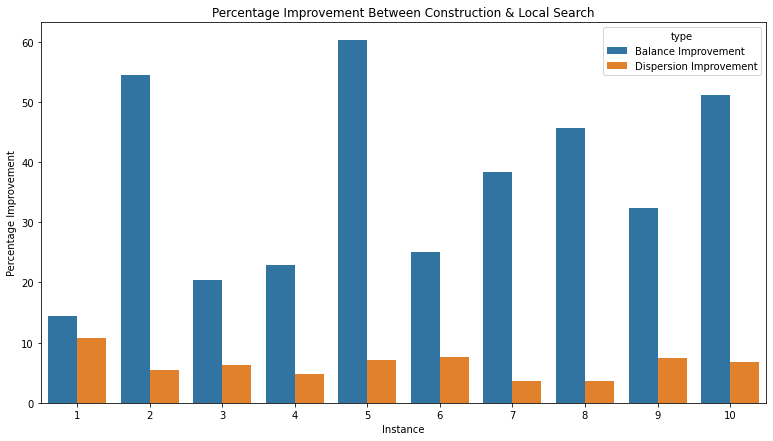

In [145]:
plt.figure(figsize=(13, 7))

fig = sns.barplot(x='Instance', y='Percentage Improvement', hue='type', data=df).set_title("Percentage Improvement Between Construction & Local Search")
#fig.title("Percentage Improvement Between Construction & Local Search")

In [31]:
district.keys()

dict_keys([20, 28, 9])

In [ ]:
districts_keys = list(local_sol.keys())

colorss = ["darkorange","lawngreen", "maroon"]

color_map = {}
for node in list(G1.nodes):
    color_map[node] = "blue"
    for k in range(len(districts_keys)):
        if node in local_sol[districts_keys[k]]:
            color_map[node] = colorss[k]

color_map = list(color_map.values())

plt.figure(3,figsize=(12,12))
nx.draw(G1,node_color=color_map, pos=grid_pos,with_labels = True)
plt.show()

In [37]:
local_obj, local_infeasible, local_sol = localsearch_grasp(district,centers_depots,combinations,adjacent_nodes,average_customers, average_demand,average_workload,shortest_paths_dict,0.3,0.05,G1)

Local Optimum Reached


In [497]:
G2 = nx.Graph()
G2.add_nodes_from(list(trial_districts.keys()))
G2.add_edge(34,81)
G2.add_edge(34,258)
G2.add_edge(34,707)
G2.add_edge(34,359)
G2.add_edge(258,269)
G2.add_edge(258,134)
G2.add_edge(258,359)
G2.add_edge(656,707)
G2.add_edge(656,359)
G2.add_edge(656,668)
G2.add_edge(707,359)
G2.add_edge(668,511)
G2.add_edge(668,269)
G2.add_edge(134,269)
G2.add_edge(511,269)

In [480]:
positions = {}
for i in G2.nodes:
    if i in grid_pos:
        positions[i]=grid_pos[i]
#grid_pos

In [ ]:
[[34, 359, 258],
 [34, 707, 359],
 [656, 707, 359],
 [269, 668, 656, 359, 258],
 [269, 511, 668],
 [269, 134, 258]]

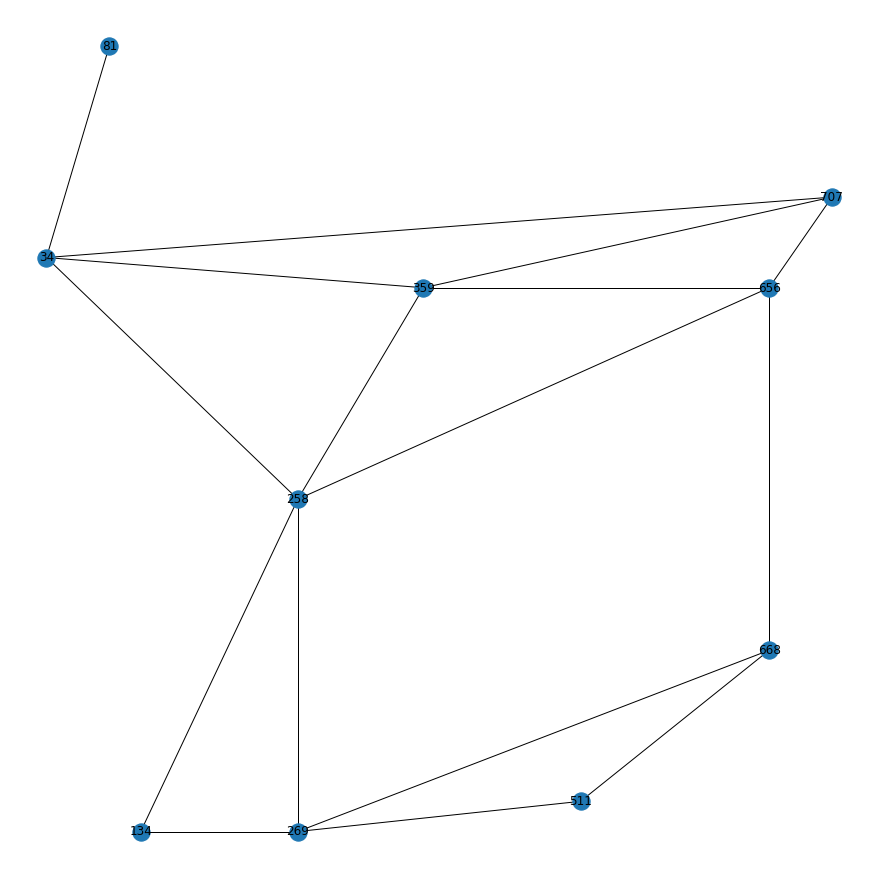

In [496]:
plt.figure(3,figsize=(12,12))
nx.draw(G2, pos=grid_pos,with_labels = True)
plt.show()

In [500]:
karate = nx.generators.social.karate_club_graph()
communities = list(nx.community.asyn_fluidc(karate, 4))

In [501]:
communities

[{4, 5, 6, 10, 16},
 {23, 24, 25, 26, 27, 29, 31},
 {0, 1, 2, 3, 7, 11, 12, 13, 17, 19, 21},
 {8, 9, 14, 15, 18, 20, 22, 28, 30, 32, 33}]

In [498]:
nx.cycle_basis(G2, root=None)

[[34, 359, 258],
 [34, 707, 359],
 [656, 707, 359],
 [269, 668, 656, 359, 258],
 [269, 511, 668],
 [269, 134, 258]]

In [475]:
list(trial_districts.keys())

[81, 258, 656, 668, 34, 359, 134, 269, 511, 707]

In [236]:
nodegobrr

[156, 157, 184, 155, 211, 130, 185, 212, 186, 213]

In [470]:
trial_districts = cp.deepcopy(district)

In [469]:
trail_districts2 = cp.deepcopy(trial_districts)

In [432]:
int(floor(0.7*len(trial_districts[34])))

35

In [ ]:
def split_district(district,percentage)
    starting_node = random.choice(district)
    partial_district = [starting_node]
    while len(partial_district) < int(floor(percentage*len(district))):
        chosen_node = random.choice(district)
        if nx.has_path(G1.subgraph(partial_district))

In [464]:
nodegobrr= [157]
trial_districts[134].remove(157)
while len(nodegobrr) < int(floor(0.4*len(trial_districts[134]))):
    chosen_node = random.choice(trial_districts[134])
    if nx.has_path(G1.subgraph(nodegobrr+[chosen_node]),nodegobrr[0],chosen_node) == True:
        nodegobrr.append(chosen_node)
        trial_districts[134].remove(chosen_node)
        paths_list = []
        for items in trial_districts[134]:
            paths_list.append(nx.has_path(G1.subgraph(trial_districts[134]+[134]),134,items))
        if False in paths_list:
            trial_districts[134].append(chosen_node)
            nodegobrr.remove(chosen_node)

In [438]:
nodegobrr= [157]
trial_districts[134].remove(157)
while len(nodegobrr) < int(floor(0.4*len(trial_districts[34]))):
    for node in trial_districts[134]:
        for i in nodegobrr:
            if node in adjacent_nodes[i]:
                if node not in nodegobrr:
#                     print("okay?")
                    nodegobrr.append(node)
                    trial_districts[134].remove(node)
                    paths_list = []
                    for items in trial_districts[134]:
                        paths_list.append(nx.has_path(G1.subgraph(trial_districts[134]+[134]),134,items))
                    if False in paths_list:
#                         print("lol")
                        trial_districts[134].append(node)
                        nodegobrr.remove(node)
                    else:
                        print("worked")

worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
